In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as st
import os
import re
import warnings
from tqdm import tqdm
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [2]:
# CONSTANTS
EXTERNAL_DATA_PATH = "../data/external"
DESTINATION_DATA_PATH = "../data/preprocessed"

In [3]:
def reduce_memory_usage(df:pd.DataFrame) -> pd.DataFrame:
        numerics = ['int8', 'int16', 'int32', 'int64', 'float8','float16', 'float32', 'float64']
        start_mem = df.memory_usage().sum() / 1024**2    
        for col in tqdm(df.columns):
            col_type = df[col].dtypes
            if col_type in numerics:
                c_min = df[col].min()
                c_max = df[col].max()
                if str(col_type)[:3] == 'int':
                    if (c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max) or (c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max):
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)  
                else:
                    if (c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max) or (c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max):
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)    
        end_mem = df.memory_usage().sum() / 1024**2
        print(f'Mem. usage decreased to {end_mem:5.2f} Mb ({100 * (start_mem - end_mem) / start_mem:.1f}% reduction)')
        return df

In [4]:
df = reduce_memory_usage(pd.read_csv(os.path.join(EXTERNAL_DATA_PATH, "train.csv"), engine = "pyarrow"))
df.head()

100%|███████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 620.50it/s]

Mem. usage decreased to  0.09 Mb (72.6% reduction)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int16  
 1   blue           2000 non-null   int16  
 2   clock_speed    2000 non-null   float32
 3   dual_sim       2000 non-null   int16  
 4   fc             2000 non-null   int16  
 5   four_g         2000 non-null   int16  
 6   int_memory     2000 non-null   int16  
 7   m_dep          2000 non-null   float32
 8   mobile_wt      2000 non-null   int16  
 9   n_cores        2000 non-null   int16  
 10  pc             2000 non-null   int16  
 11  px_height      2000 non-null   int16  
 12  px_width       2000 non-null   int16  
 13  ram            2000 non-null   int16  
 14  sc_h           2000 non-null   int16  
 15  sc_w           2000 non-null   int16  
 16  talk_time      2000 non-null   int16  
 17  three_g        2000 non-null   int16  
 18  touch_sc

<Axes: xlabel='price_range', ylabel='count'>

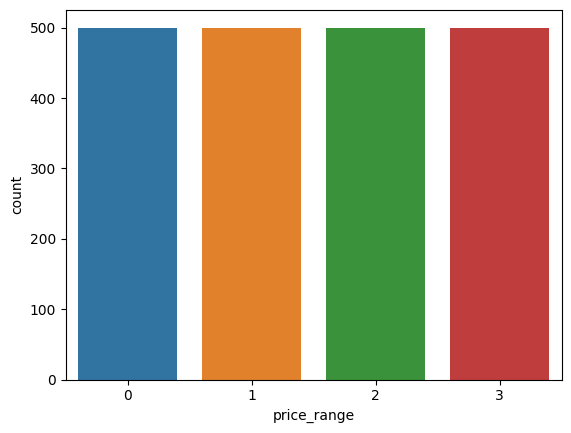

In [6]:
#data is balanced and that's very good start!!!!!
sns.countplot(data = df, x = "price_range")

Text(0.5, 1.0, 'Battery Powers for each Price Range')

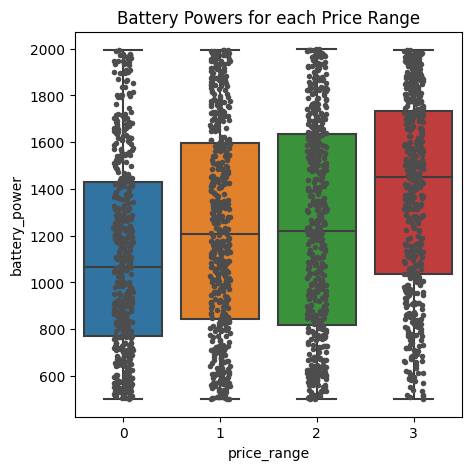

In [7]:
# there is no outliers..
# price range 3 has a high battery power compared to the others, and number of observations that has low battery power is small...
# also price range 0 is vice versa..
# 1 and 2 are close to each others...
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="battery_power", x="price_range", data=df)
sns.stripplot(y="battery_power", x="price_range", data=df,
              size=4, color=".3", linewidth=0)
ax.set_title("Battery Powers for each Price Range")

<Axes: xlabel='price_range', ylabel='count'>

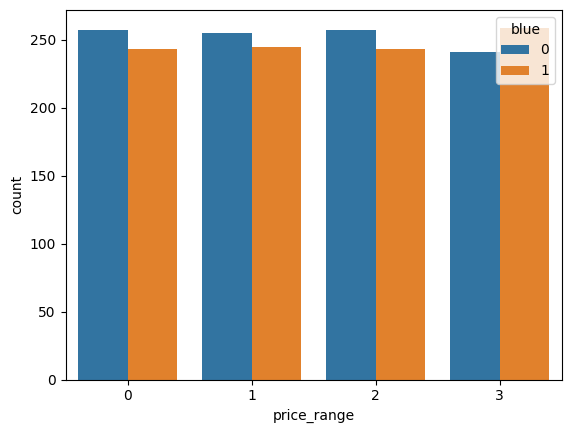

In [8]:
# 0,1 and 2 is similar all of them closely have the same frequency..
# 3 has more observations that has bluetooth..
sns.countplot(data = df, x = "price_range", hue = "blue")

Text(0.5, 1.0, 'Processor speed for each Price Range')

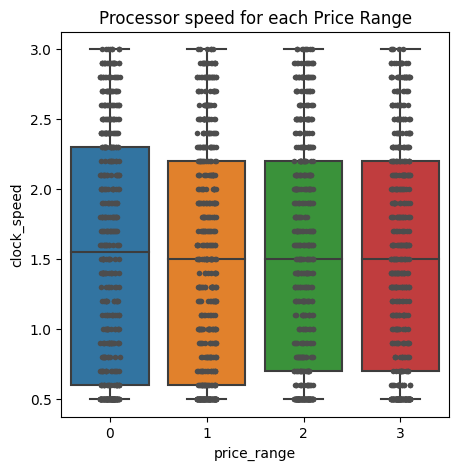

In [9]:
# looks like no difference between all price ranges...
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="clock_speed", x="price_range", data=df)
sns.stripplot(y="clock_speed", x="price_range", data=df,
              size=4, color=".3", linewidth=0)
ax.set_title("Processor speed for each Price Range")

<Axes: xlabel='price_range', ylabel='count'>

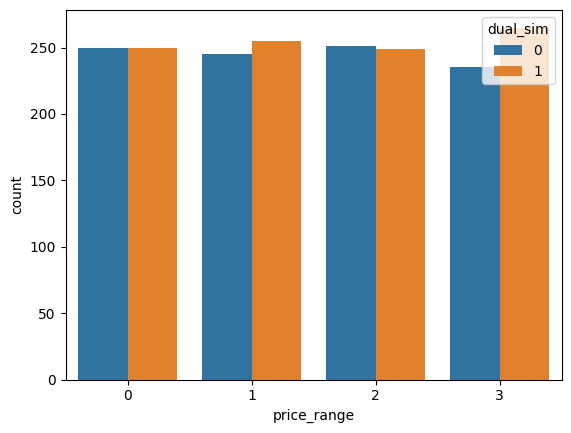

In [10]:
sns.countplot(data = df, x = "price_range", hue = "dual_sim")

<Axes: xlabel='fc', ylabel='Density'>

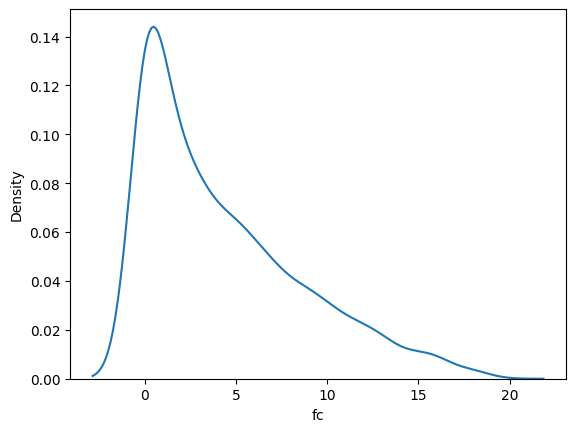

In [11]:
# distribution of front camera mega pixels..
# right skewed distribution
sns.kdeplot(data=df, x="fc")

Text(0.5, 1.0, 'Front-Camera for each Price Range')

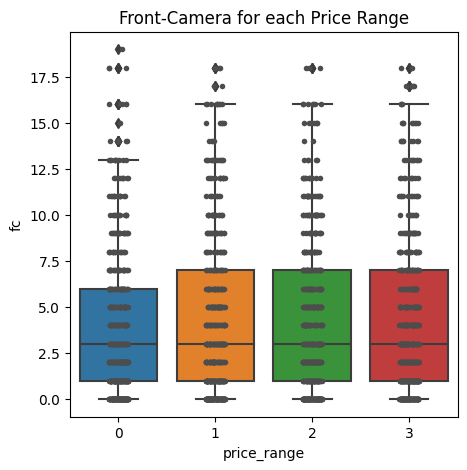

In [12]:
# most of distributions are similar...
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="fc", x="price_range", data=df)
sns.stripplot(y="fc", x="price_range", data=df,
              size=4, color=".3", linewidth=0)
ax.set_title("Front-Camera for each Price Range")

<Axes: xlabel='four_g', ylabel='count'>

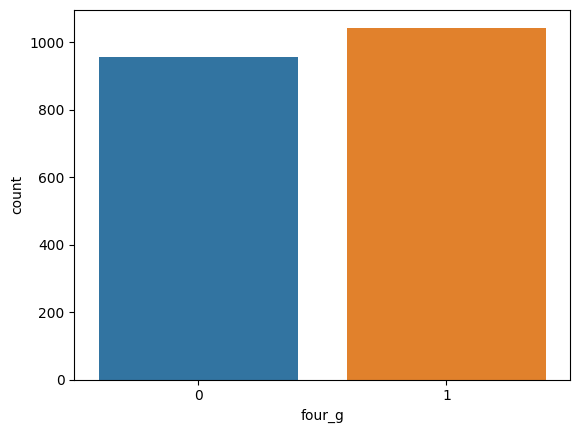

In [13]:
sns.countplot(data = df, x = "four_g")

<Axes: xlabel='price_range', ylabel='count'>

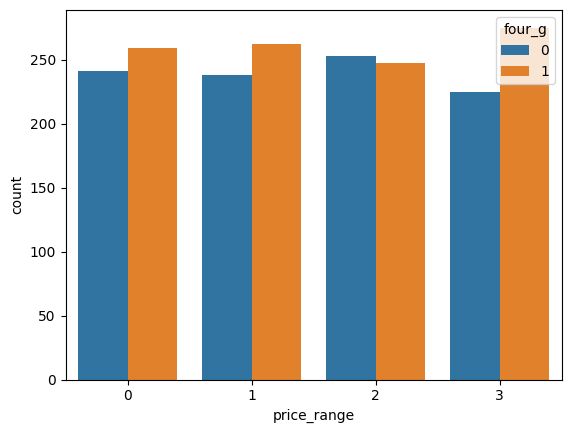

In [14]:
# four G effect
# there is indication that there are more devices that has no 4G but in high category.
# in very high there is significance that there are alot of divces has 4G than devices that don't have...
sns.countplot(data = df, x = "price_range", hue = "four_g")

<Axes: xlabel='three_g', ylabel='count'>

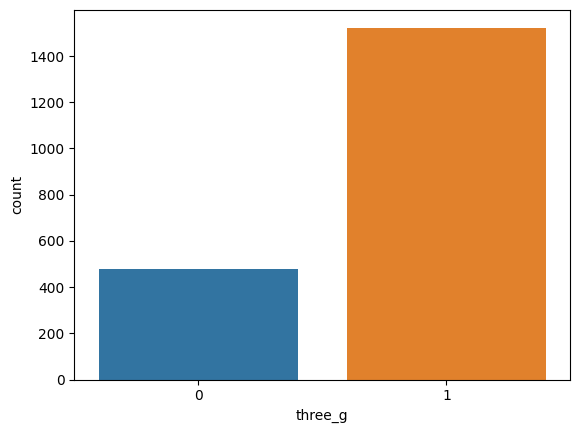

In [15]:
sns.countplot(data = df, x = "three_g")

<Axes: xlabel='price_range', ylabel='count'>

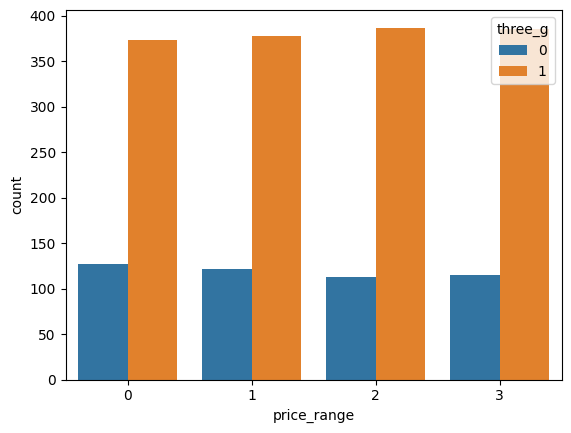

In [16]:
# no thing to be added all of them are similar....
sns.countplot(data = df, x = "price_range", hue = "three_g")

<Axes: xlabel='price_range', ylabel='count'>

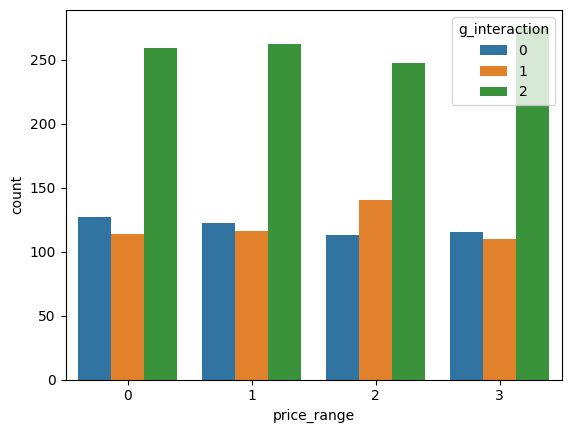

In [17]:
# let's no explore the interaction....
# there are devices that has no 4G or 3G, and exist in all distributions..
# devices that has 4G and 3G are dominant in all price ranges..
df["g_interaction"] = df["three_g"] + df["four_g"]
sns.countplot(data = df, x = "price_range", hue = "g_interaction")

Text(0.5, 1.0, 'Internal Storage for each Price Range')

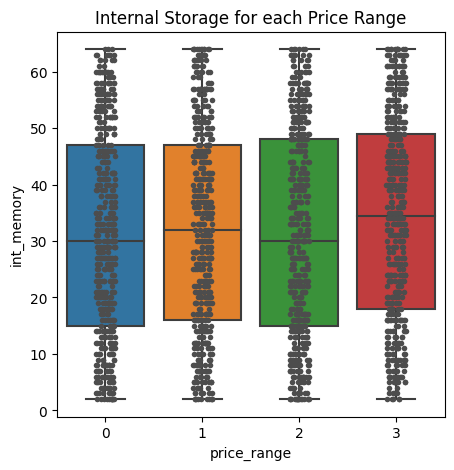

In [18]:
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="int_memory", x="price_range", data=df)
sns.stripplot(y="int_memory", x="price_range", data=df,
              size=4, color=".3", linewidth=0)
ax.set_title("Internal Storage for each Price Range")

Text(0.5, 1.0, 'Mobile Depth for each Price Range')

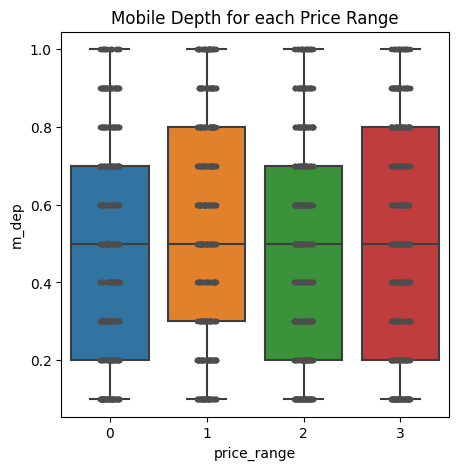

In [19]:
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="m_dep", x="price_range", data=df)
sns.stripplot(y="m_dep", x="price_range", data=df,
              size=4, color=".3", linewidth=0)
ax.set_title("Mobile Depth for each Price Range")

Text(0.5, 1.0, 'Mobile Weight for each Price Range')

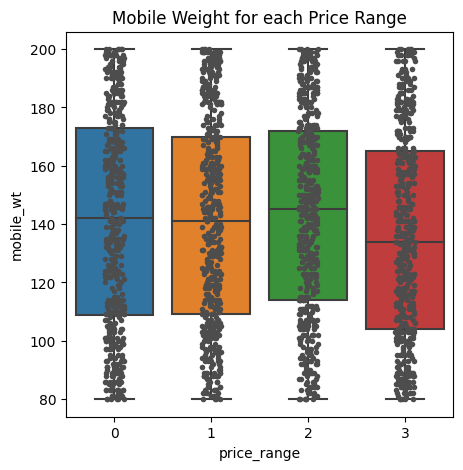

In [20]:
# range 3 have lighter weights..
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="mobile_wt", x="price_range", data=df)
sns.stripplot(y="mobile_wt", x="price_range", data=df,
              size=4, color=".3", linewidth=0)
ax.set_title("Mobile Weight for each Price Range")

In [21]:
df["n_cores"].value_counts(normalize = True)

n_cores
4    0.1370
7    0.1295
8    0.1280
2    0.1235
3    0.1230
5    0.1230
1    0.1210
6    0.1150
Name: proportion, dtype: float64

<Axes: xlabel='price_range', ylabel='count'>

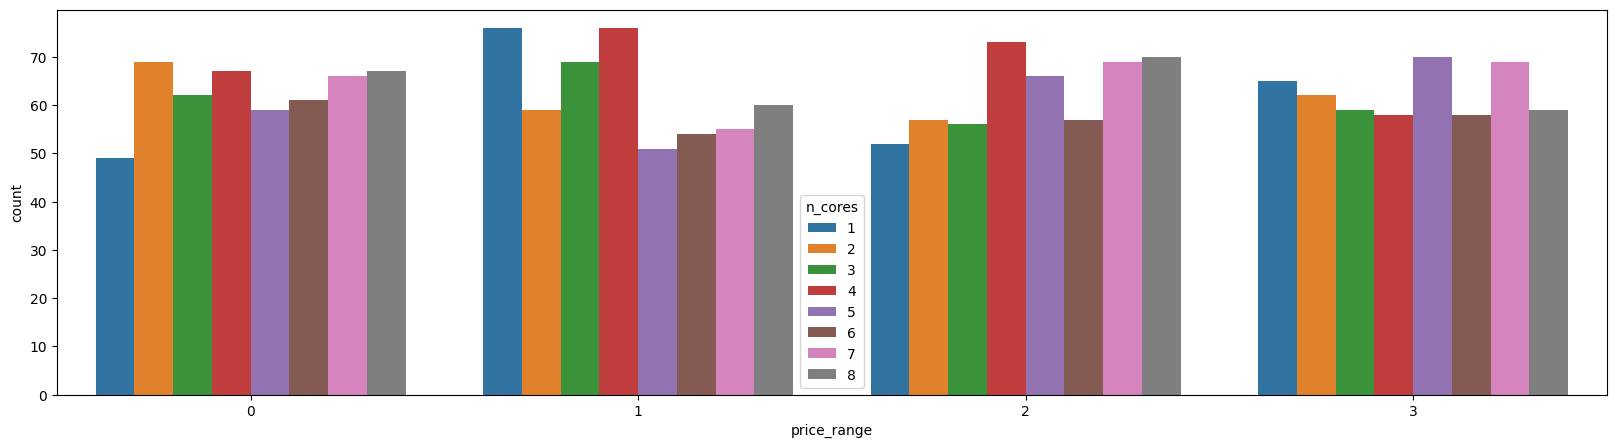

In [22]:
plt.figure(figsize = (20, 5))
sns.countplot(data = df, x = "price_range", hue = "n_cores")

Text(0.5, 1.0, 'cpu_interaction for each Price Range')

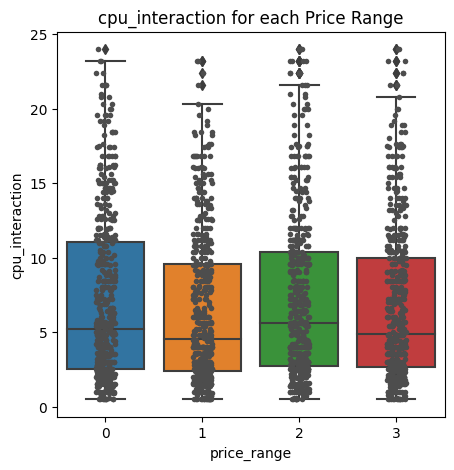

In [23]:
df["cpu_interaction"] = df["clock_speed"] * df["n_cores"]
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="cpu_interaction", x="price_range", data=df)
sns.stripplot(y="cpu_interaction", x="price_range", data=df,
              size=4, color=".3", linewidth=0)
ax.set_title("cpu_interaction for each Price Range")

Text(0.5, 1.0, 'Primary-Camera for each Price Range')

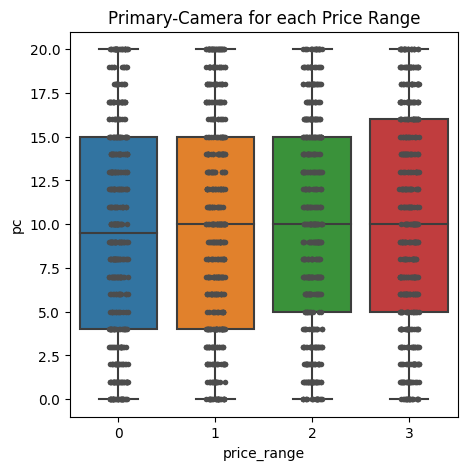

In [24]:
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="pc", x="price_range", data=df)
sns.stripplot(y="pc", x="price_range", data=df,
              size=4, color=".3", linewidth=0)
ax.set_title("Primary-Camera for each Price Range")

Text(0.5, 1.0, 'camera_interaction for each Price Range')

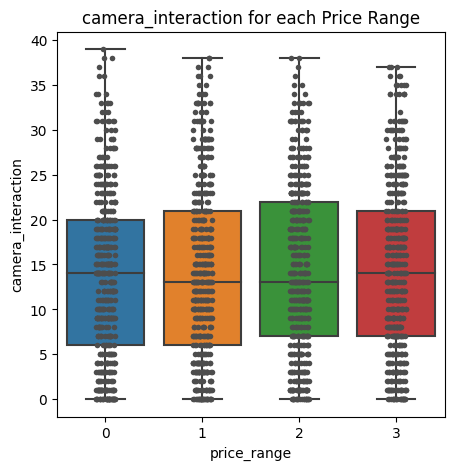

In [25]:
df["camera_interaction"] = df["pc"] + df["fc"]
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="camera_interaction", x="price_range", data=df)
sns.stripplot(y="camera_interaction", x="price_range", data=df,
              size=4, color=".3", linewidth=0)
ax.set_title("camera_interaction for each Price Range")

Text(0.5, 1.0, 'pixel height for each Price Range')

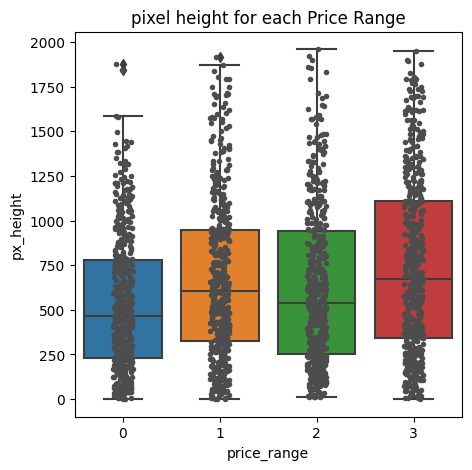

In [26]:
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="px_height", x="price_range", data=df)
sns.stripplot(y="px_height", x="price_range", data=df,
              size=4, color=".3", linewidth=0)
ax.set_title("pixel height for each Price Range")

Text(0.5, 1.0, 'pixel width for each Price Range')

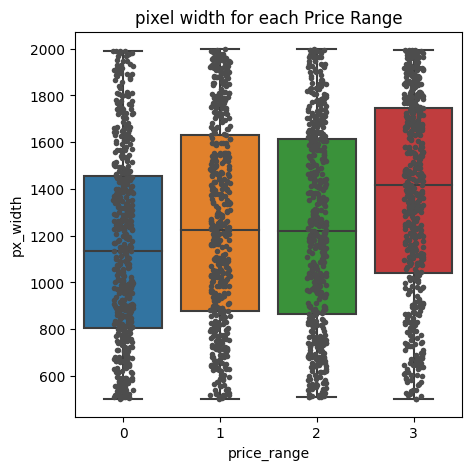

In [27]:
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="px_width", x="price_range", data=df)
sns.stripplot(y="px_width", x="price_range", data=df,
              size=4, color=".3", linewidth=0)
ax.set_title("pixel width for each Price Range")

Text(0.5, 1.0, 'pixel interaction for each Price Range')

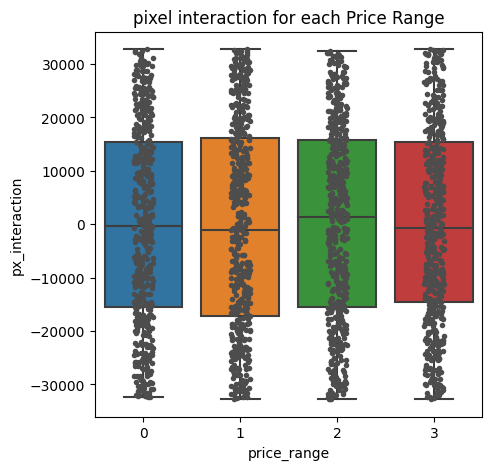

In [29]:
df["px_interaction"] = df["px_height"]*df["px_width"]
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="px_interaction", x="price_range", data=df)
sns.stripplot(y="px_interaction", x="price_range", data=df,
              size=4, color=".3", linewidth=0)
ax.set_title("pixel interaction for each Price Range")

<Axes: xlabel='ram', ylabel='Density'>

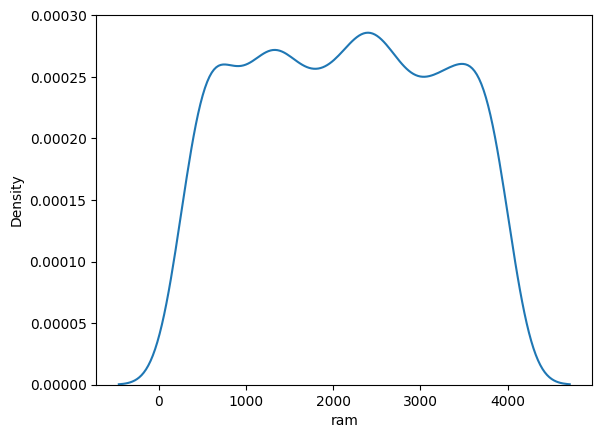

In [30]:
sns.kdeplot(data=df, x="ram")

Text(0.5, 1.0, 'RAM for each Price Range')

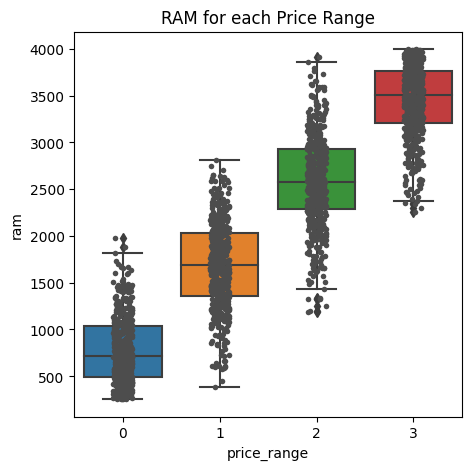

In [32]:
# ram size is significant in deciding the price range...
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="ram", x="price_range", data=df)
sns.stripplot(y="ram", x="price_range", data=df,
              size=4, color=".3", linewidth=0)
ax.set_title("RAM for each Price Range")

Text(0.5, 1.0, 'screen height for each Price Range')

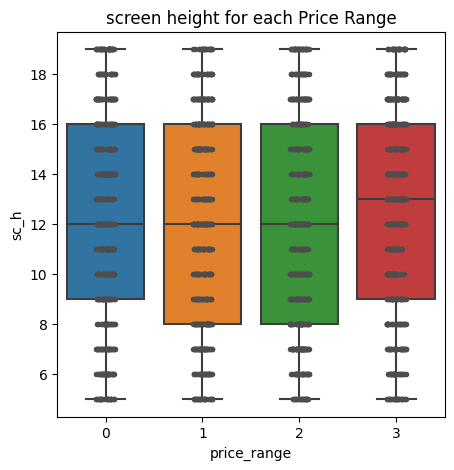

In [33]:
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="sc_h", x="price_range", data=df)
sns.stripplot(y="sc_h", x="price_range", data=df,
              size=4, color=".3", linewidth=0)
ax.set_title("screen height for each Price Range")

Text(0.5, 1.0, 'screen width for each Price Range')

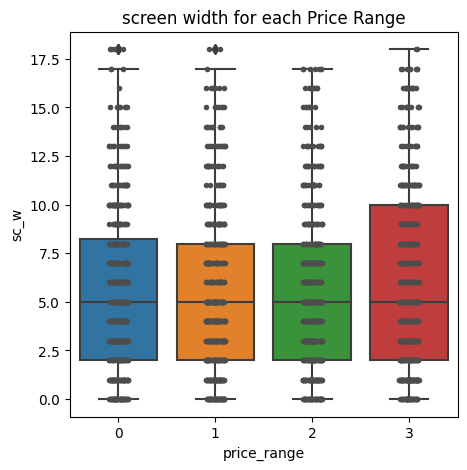

In [34]:
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="sc_w", x="price_range", data=df)
sns.stripplot(y="sc_w", x="price_range", data=df,
              size=4, color=".3", linewidth=0)
ax.set_title("screen width for each Price Range")

Text(0.5, 1.0, 'screen interaction for each Price Range')

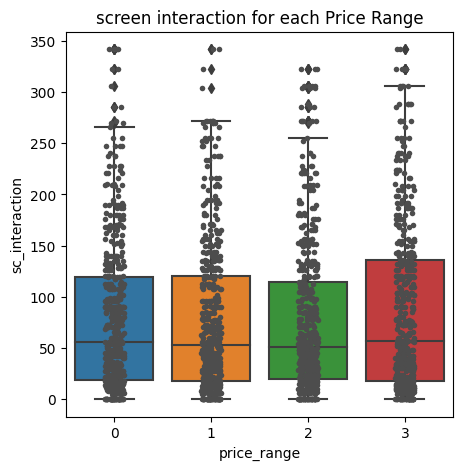

In [35]:
df["sc_interaction"] = df["sc_h"]*df["sc_w"]
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="sc_interaction", x="price_range", data=df)
sns.stripplot(y="sc_interaction", x="price_range", data=df,
              size=4, color=".3", linewidth=0)
ax.set_title("screen interaction for each Price Range")

<Axes: xlabel='talk_time', ylabel='Density'>

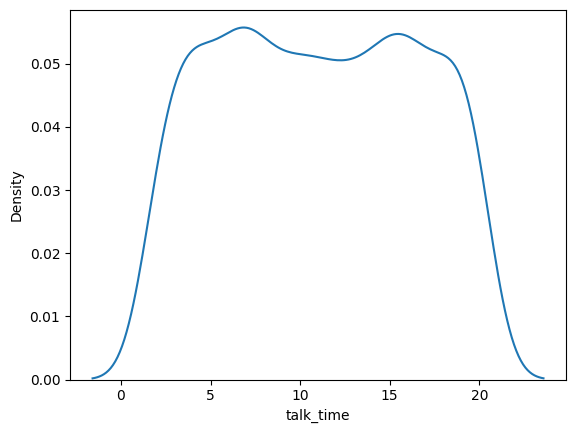

In [36]:
sns.kdeplot(data=df, x="talk_time")

Text(0.5, 1.0, 'Talk Time for each Price Range')

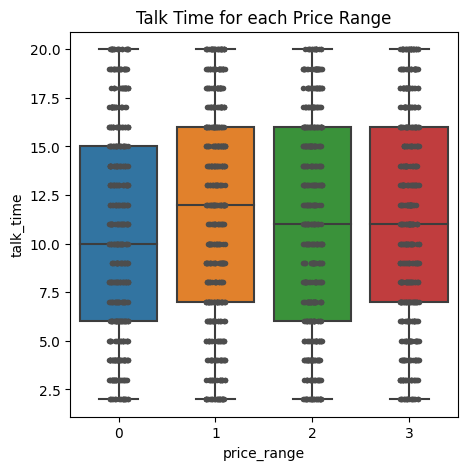

In [37]:
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="talk_time", x="price_range", data=df)
sns.stripplot(y="talk_time", x="price_range", data=df,
              size=4, color=".3", linewidth=0)
ax.set_title("Talk Time for each Price Range")

<Axes: xlabel='price_range', ylabel='count'>

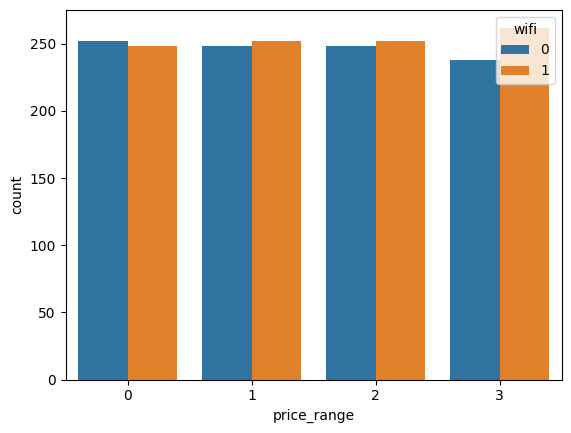

In [40]:
sns.countplot(data = df, x = "price_range", hue = "wifi")

<Axes: xlabel='price_range', ylabel='count'>

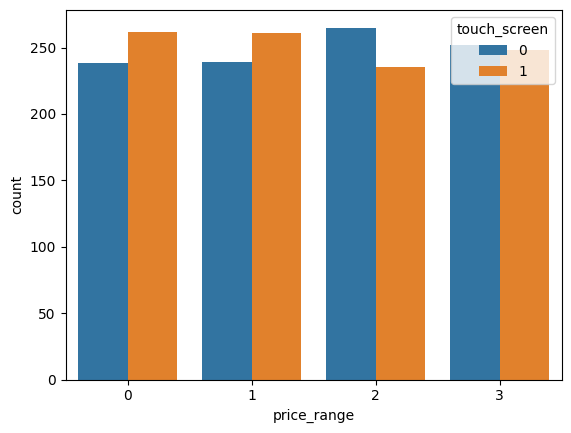

In [41]:
sns.countplot(data = df, x = "price_range", hue = "touch_screen")

<Axes: xlabel='price_range', ylabel='count'>

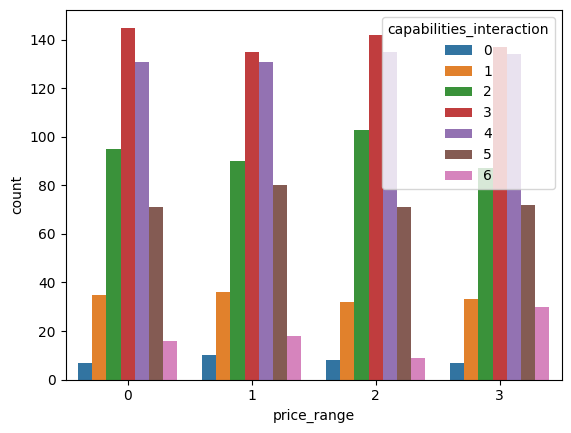

In [71]:
df["capabilities_interaction"] = df["wifi"]+df["touch_screen"]+df["blue"]+df["dual_sim"]+df["g_interaction"]
sns.countplot(data = df, x = "price_range", hue = "capabilities_interaction")

In [72]:
num_cols = ["ram", "sc_interaction", "sc_w", "sc_h", "px_height", "px_width", "px_interaction",
            "camera_interaction", "pc", "fc", "mobile_wt", "cpu_interaction",
            "clock_speed", "battery_power", "int_memory", "m_dep"]
cat_cols = ["touch_screen", "wifi", "four_g", "three_g", "n_cores", "dual_sim", "blue", "g_interaction", "capabilities_interaction"]
X, y = df.drop("price_range", axis = 1), df["price_range"]
cat_cols_idx = [idx for idx, col in enumerate(X.columns) if col in cat_cols]

In [65]:
from sklearn.feature_selection import mutual_info_classif

In [73]:
mi = mutual_info_classif(X, y, discrete_features=cat_cols_idx, random_state=42)

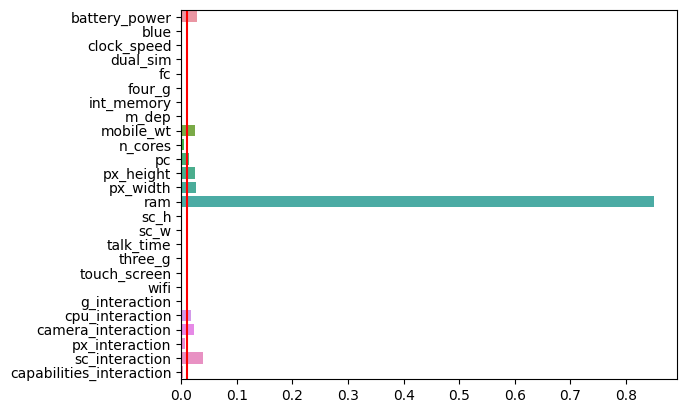

In [74]:
sns.barplot(y = X.columns, x = mi)
plt.axvline(0.01, color = 'r')